In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("Setup Complete")


Setup Complete


In [2]:

webpage = requests.get("https://www.ft.com/content/8b37a92b-15e6-4b9c-8427-315a8b5f4332")

soup = BeautifulSoup(webpage.content, "html.parser")

In [62]:
companyNames = []
countries = []
categories = []
absoluteGrowthRates = []
numberOfEmployees = []
revenue19 = []

for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    companyName = row.findAll('td')[1].get_text()
    companyNames.append(companyName)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    country = row.findAll('td')[4].get_text()
    countries.append(country)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    category = row.findAll('td')[5].get_text()
    categories.append(category)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    absoluteGrowthRate = row.findAll('td')[6].get_text().replace(",","")[:-1]
    absoluteGrowthRates.append(float(absoluteGrowthRate))
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    revenues19 = row.findAll('td')[8].get_text().replace(",","")[:-1]
    revenue19.append(float(revenues19))
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    numberOfEmployee = row.findAll('td')[10].get_text()
    numberOfEmployees.append(float(numberOfEmployee if numberOfEmployee != 'n/a' else 'nan'))
    


In [63]:
companyDict = {"companyNames":companyNames, "countries": countries, "categories":categories, "absoluteGrowthRates": absoluteGrowthRates, "numberOfEmployees":numberOfEmployees, "revenue 2019":revenue19}
companyRates_df = pd.DataFrame.from_dict(companyDict)  

In [64]:
companyRates_df.describe()

,absoluteGrowthRates,numberOfEmployees,revenue 2019
count,999.000000,990.000000,9.990000e+02
mean,664.089089,90.578788,1.738215e+06
std,2292.736171,345.605744,5.705049e+06
min,15.000000,1.000000,1.500000e+05
25%,187.000000,14.000000,3.179095e+05
50%,286.000000,33.000000,6.342220e+05
75%,554.500000,77.750000,1.439177e+06
max,61837.000000,8389.000000,1.376444e+08


In [65]:
companyRates_df.countries.value_counts().nlargest(10)

Italy          268
Germany        204
France         162
UK             131
Spain           54
Poland          31
Sweden          24
Netherlands     22
Finland         13
Estonia          9
Name: countries, dtype: int64

In [66]:
mean_vals = companyRates_df.groupby("countries").absoluteGrowthRates.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

countries
Latvia         12605.400000
Estonia         1215.333333
Austria         1033.333333
UK              1026.648855
Poland           915.741935
Netherlands      886.681818
Sweden           870.291667
Bulgaria         812.500000
Greece           773.250000
Slovakia         772.000000
Name: absoluteGrowthRates, dtype: float64


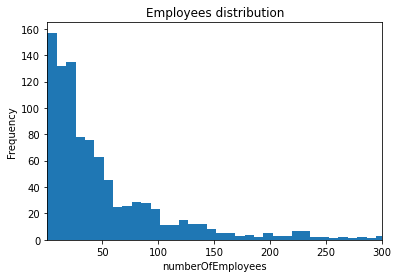

In [67]:
plt.hist(companyRates_df.numberOfEmployees, bins=1000)
plt.title("Employees distribution")
plt.xlabel("numberOfEmployees")
plt.ylabel("Frequency")
plt.xlim(1, 300)
plt.show()

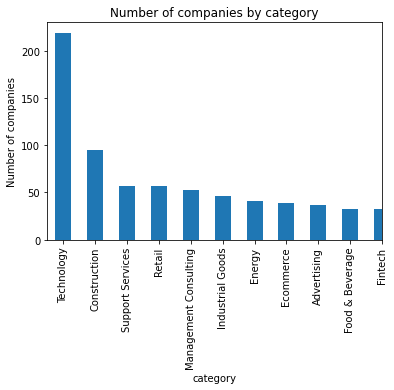

In [68]:
category_type = pd.value_counts(companyRates_df['categories'].values, sort=True)

ax = category_type.plot(kind='bar', title='Number of companies by category')
ax.set(xlabel='category', ylabel='Number of companies')
plt.xlim(right=10)
plt.show()

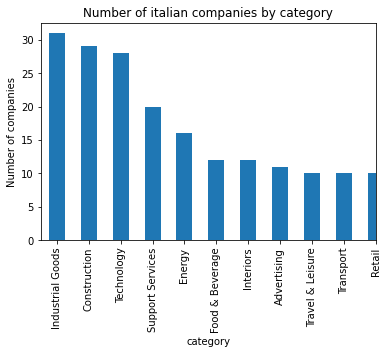

In [69]:
italianCompanies =  companyRates_df['countries']=="Italy"
italianCompanies_df = companyRates_df[italianCompanies]

category_type = pd.value_counts(italianCompanies_df['categories'].values, sort=True)

ax = category_type.plot(kind='bar', title='Number of italian companies by category')
ax.set(xlabel='category', ylabel='Number of companies')
plt.xlim(right=10)
plt.show()

In [79]:
italianCompanies_df[italianCompanies_df['categories']=="Technology"].sort_values(by=['absoluteGrowthRates'], ascending=False)

,companyNames,countries,categories,absoluteGrowthRates,numberOfEmployees,revenue 2019
66,Mia-Platform,Italy,Technology,1622.0,40.0,495640.0
77,Bending Spoons,Italy,Technology,1489.0,128.0,7498953.0
88,Alias Group,Italy,Technology,1363.0,12.0,356673.0
123,Ubiquicom,Italy,Technology,1111.0,18.0,314107.0
128,Ayes,Italy,Technology,1055.0,141.0,836545.0
144,Sixth Sense,Italy,Technology,963.0,5.0,261095.0
153,Contrader,Italy,Technology,908.0,38.0,254933.0
242,Vmway,Italy,Technology,608.0,56.0,1379622.0
255,Uqido,Italy,Technology,589.0,30.0,198866.0
383,Agile Lab,Italy,Technology,422.0,33.0,497456.0


In [71]:
mean_vals = companyRates_df.groupby("categories").numberOfEmployees.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

categories
Support Services         362.750000
Insurance                256.750000
Financial Services       236.428571
Fintech                  126.218750
Management Consulting    114.607843
Technology               110.105991
Transport                106.666667
Restaurants               88.625000
Travel & Leisure          88.000000
Telecoms                  84.384615
Name: numberOfEmployees, dtype: float64


In [72]:
mean_vals = companyRates_df.groupby("categories").absoluteGrowthRates.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

categories
Fintech               3096.625000
Batteries             2625.666667
Energy                1003.487805
Interiors              852.400000
Technology             787.561644
Food & Beverage        666.312500
Financial Services     631.619048
Fashion                600.222222
Insurance              598.250000
Health                 569.880000
Name: absoluteGrowthRates, dtype: float64


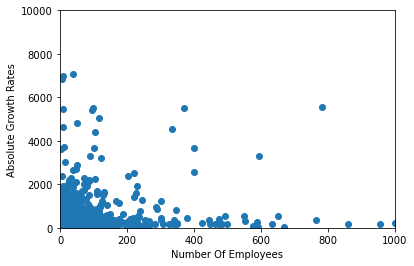

In [73]:
plt.scatter(companyRates_df.numberOfEmployees, companyRates_df.absoluteGrowthRates)
plt.axis([0, 1000, 0, 10000])
plt.xlabel('Number Of Employees')
plt.ylabel('Absolute Growth Rates')

plt.show()

<AxesSubplot:>

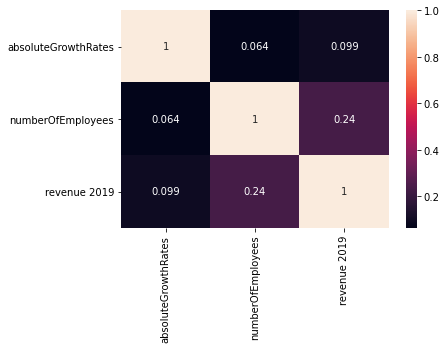

In [74]:
Var_Corr = companyRates_df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)